# Игра в карты

Часто игра в карты сводится к простому подсчету очков, для того чтобы узнать, кто выиграл. Попробуем реализовать алгоритм, который будет подсчитывать очки, выпавшие на игровом столе.

In [ ]:
!pip install imutils
import cv2
import imutils
import numpy as np
from matplotlib import pyplot as plt

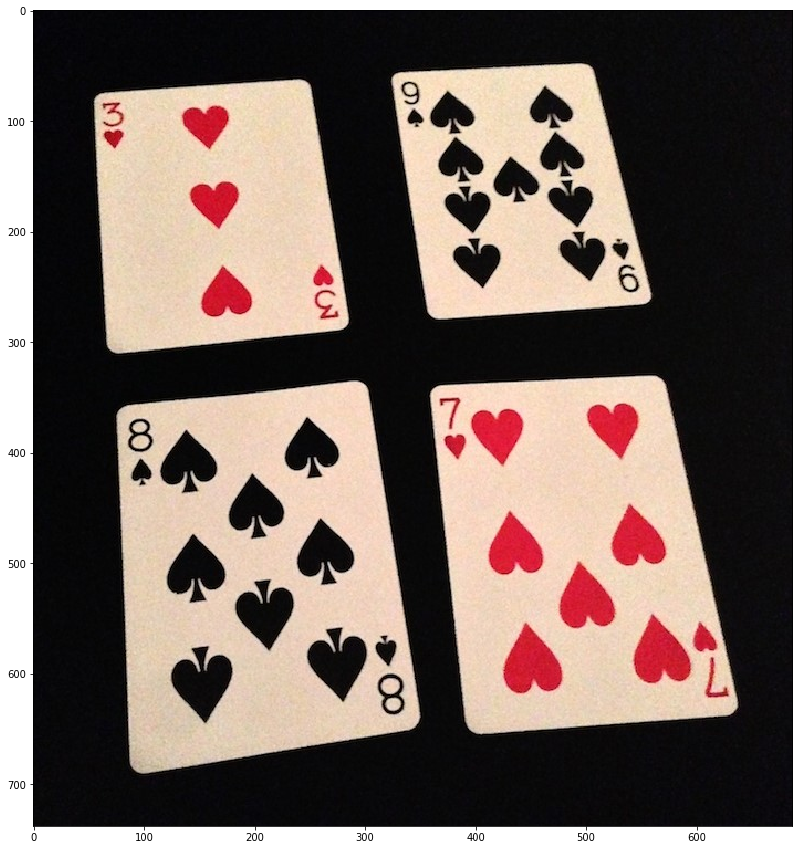

In [ ]:
image = cv2.imread("card.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 15))
plt.imshow(image)
plt.show()

Какой алгоритм поиска будет здесь использоваться? Какой пайплайн? (Загуглите это слово)

*Пока не определится пайплайн, дальше не идем*

## 1. Идентификация карт

Необходимо определить наличие карт на изображении и найти их контуры, как в случае с книгами

In [ ]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(1,1),1000)
flag, thresh = cv2.threshold(blur, 120, 255, cv2.THRESH_BINARY)

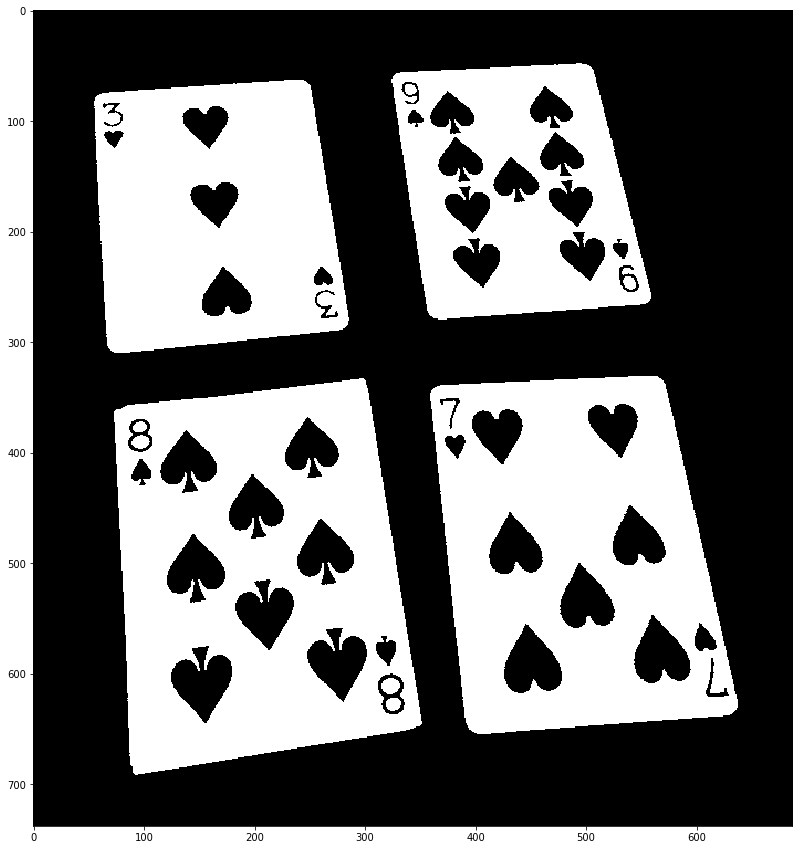

In [ ]:
thresh1 = cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 15))
plt.imshow(thresh1)
plt.show()

In [ ]:
contours = cv2.findContours(thresh, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
total = 0
# цикл по контурам
for c in contours[0]:
    # аппроксимируем (сглаживаем) контур
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)

    # если у контура 4 вершины, предполагаем, что это книга
    if len(approx) == 4:
        cv2.drawContours(image, [approx], -1, (0, 255, 0), 4)
        total += 1

Я нашёл 4 карт на этой картинке


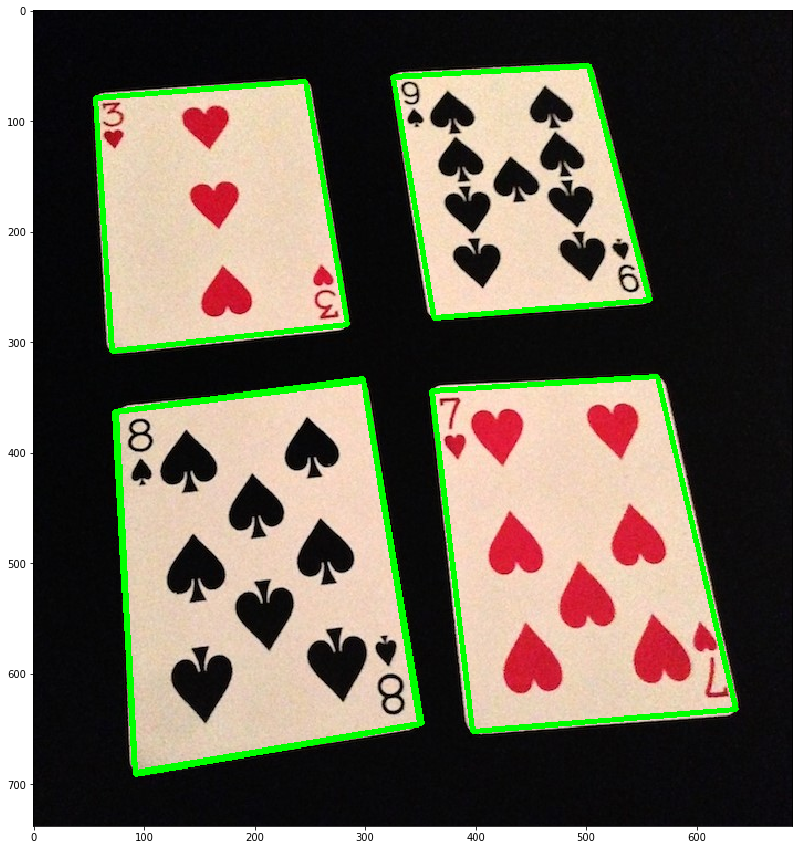

In [ ]:
# показываем результирующее изображение
print("Я нашёл {0} карт на этой картинке".format(total))
cv2.imwrite("output.jpg", image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 15))
plt.imshow(image)
plt.show()

## 2. Регистрация карт

Для каждого прямоугольника применим аффинное преобразование, чтобы преобразовать изображение каждой карты в прямоугольное представление, чтобы его можно было легко распознать:

In [ ]:
total = 0
# цикл по контурам
for c in contours[0]:
    # аппроксимируем (сглаживаем) контур
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)

    # если у контура 4 вершины, предполагаем, что это карта
    if len(approx) == 4:
        cv2.drawContours(image, [approx], -1, (0, 255, 0), 4)
        total += 1

        # сделаем это только для одного контура
        break

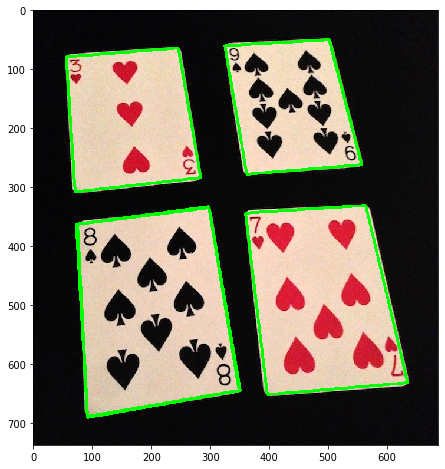

In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.show()

In [ ]:
h = np.array([[0,0],[449,0],[449,449],[0,449]], np.float32)
transform = cv2.getPerspectiveTransform(np.array(approx.reshape(4,2), np.float32), h) #зачем применяем reshape?
warp = cv2.warpPerspective(image, transform,(450,450))

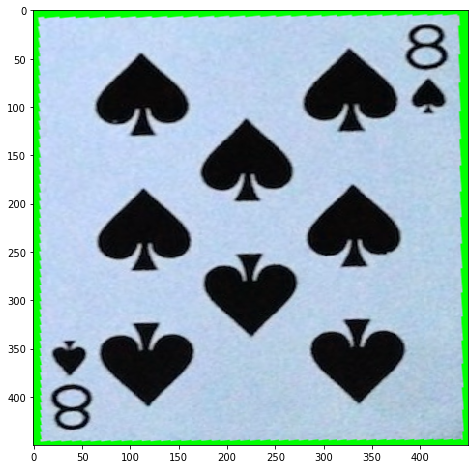

In [ ]:
warp = cv2.cvtColor(warp, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 8))
plt.imshow(warp)
plt.show()

In [ ]:
h = np.array([[0,0],[100,0],[100,300],[0,300]], np.float32)
transform = cv2.getPerspectiveTransform(np.array(approx.reshape(4,2), np.float32), h) #зачем применяем reshape?
warp = cv2.warpPerspective(image, transform,(450,450))

**[Задание]** закончите цикл для всех карт с изображения

In [ ]:
image = cv2.imread("card.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
total = 0
# цикл по контурам
for c in contours[0]:
    # аппроксимируем (сглаживаем) контур
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)

    # если у контура 4 вершины, предполагаем, что это карта
    if len(approx) == 4:
    # cv2.drawContours(image, [approx], -1, (0, 255, 0), 4)
        total += 1

        h = np.array([[0,0],[449,0],[449,449],[0,449]], np.float32)
        transform = cv2.getPerspectiveTransform(np.array(approx.reshape(4,2), np.float32), h) #зачем применяем reshape?
        warp = cv2.warpPerspective(image, transform,(450,450))

        warp = cv2.cvtColor(warp, cv2.COLOR_BGR2RGB)
        cv2.imwrite(str("card"+str(total)+".jpg"), warp)

## 3. Распознавание карт

Теперь, когда у нас есть зарегистрированное представление карты, следующим шагом является ее распознавание. Для этого нам нужно использвать тренировочную колоду, чтобы сообщить нашему коду, как выглядит каждая карта.


![image.png](attachment:image.png)

**[Задание]** нужно подготовить тренировочную колоду с разметкой по всем картам

Можно это сделать в виде сохранения каждой карты в отдельном файле, либо помечая каждую карту вручную в текстовом файле для всего изображения.

Теперь, когда мы знаем, как выглядит каждая карта, следующий шаг - сопоставить ее с входящей картой кандидата. Оба выстроены / зарегистрированы, и оба прошли одну и ту же предварительную обработку. Есть много надежных алгоритмов для этой проблемы, которые могут использоваться для этой проблемы: мы могли бы распознать каждую цифру / букву, используя распознавание символов, или даже распознать символы масти на каждой карточке и подсчитать их, чтобы получить цифру ,

Самым простым вариантом здесь, однако, является просто спросить насколько отличается изображение входящей карты от каждой учебной карты? Мы можем просто написать это как:

In [ ]:
def preprocess(img):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),2 )
    thresh = cv2.adaptiveThreshold(blur,255,1,1,11,1)
    blur_thresh = cv2.GaussianBlur(thresh,(5,5),5)
    return blur_thresh

Для одинаковых карт:

In [ ]:
img1 = cv2.imread("card1.jpg")
img2 = cv2.imread("card1.jpg")

In [ ]:
diff = cv2.absdiff(preprocess(img1),preprocess(img2))
diff = cv2.GaussianBlur(diff,(5,5),5)
flag, diff = cv2.threshold(diff, 200, 255, cv2.THRESH_BINARY)
print(np.sum(diff))

0


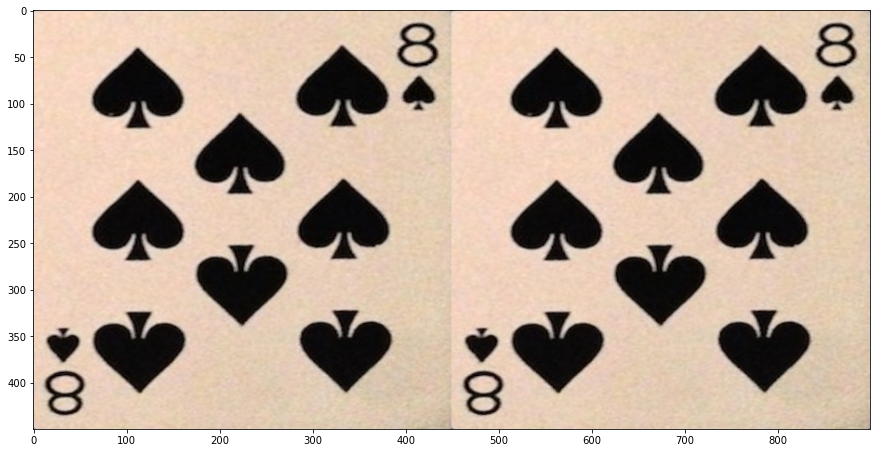

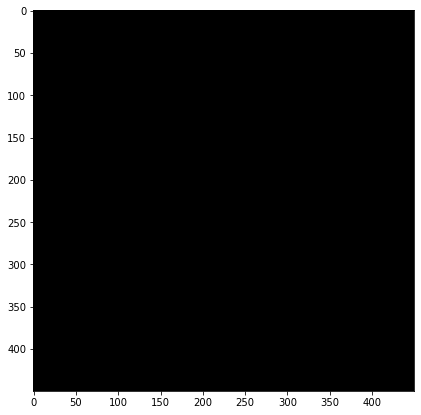

In [ ]:
img = np.concatenate((img1, img2), 1)
plt.figure(figsize=(15, 15))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

plt.figure(figsize=(7, 7))
diff = cv2.cvtColor(diff, cv2.COLOR_BGR2RGB)
plt.imshow(diff)
plt.show()

Для разных карт:

In [ ]:
img1 = cv2.imread("card1.jpg")
img2 = cv2.imread("card2.jpg")

In [ ]:
diff = cv2.absdiff(preprocess(img1),preprocess(img2))
diff = cv2.GaussianBlur(diff,(5,5),5)
flag, diff = cv2.threshold(diff, 200, 255, cv2.THRESH_BINARY)
print(np.sum(diff))

866490


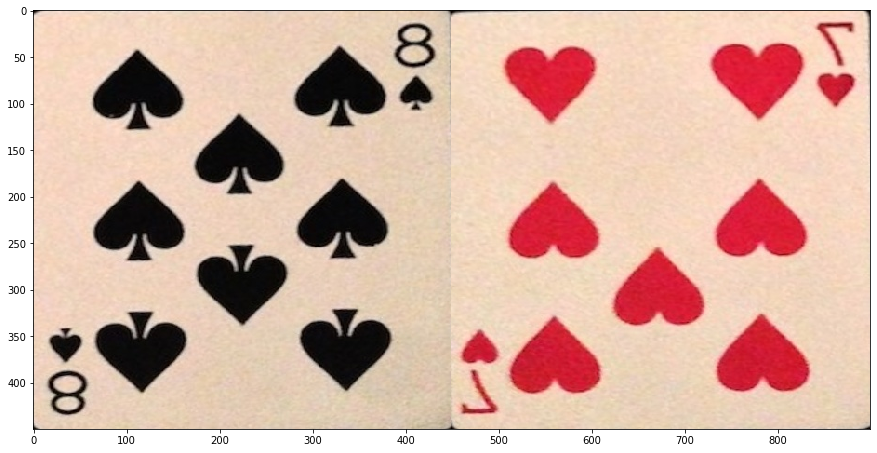

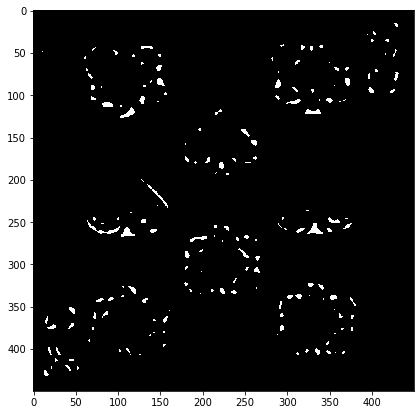

In [ ]:
img = np.concatenate((img1, img2), 1)
plt.figure(figsize=(15, 15))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

plt.figure(figsize=(7, 7))
diff = cv2.cvtColor(diff, cv2.COLOR_BGR2RGB)
plt.imshow(diff)
plt.show()

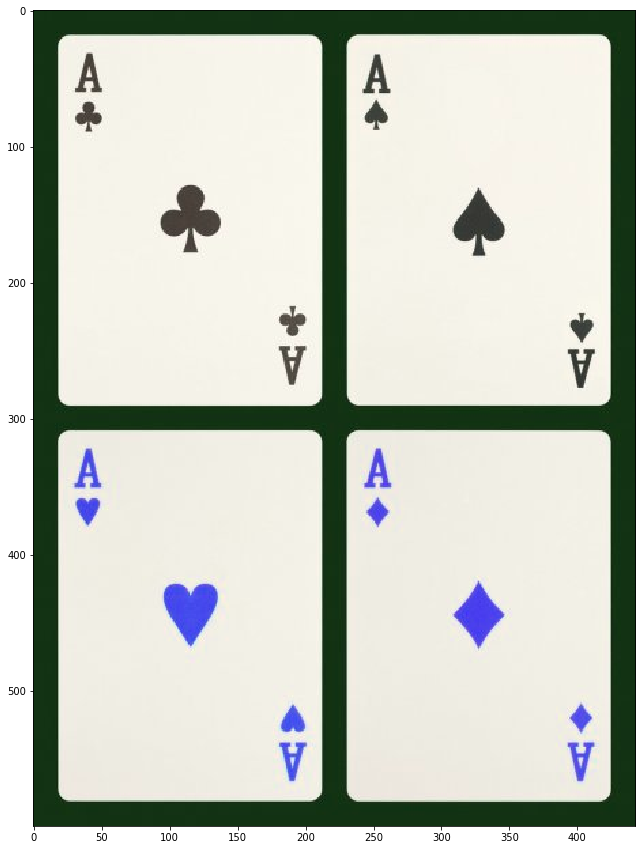

In [ ]:
image=cv2.imread("tuzi.jpg")
plt.figure(figsize=(15, 15))
plt.imshow(image)
plt.show()


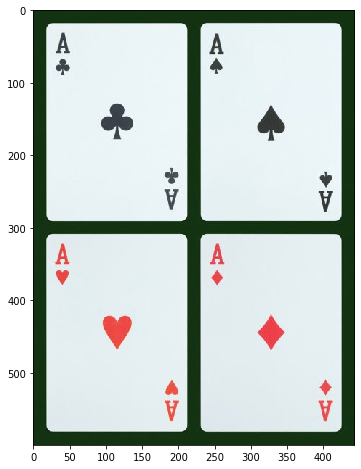

In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.show()

In [ ]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(11,11),1000)
flag, thresh = cv2.threshold(blur, 120, 255, cv2.THRESH_BINARY)

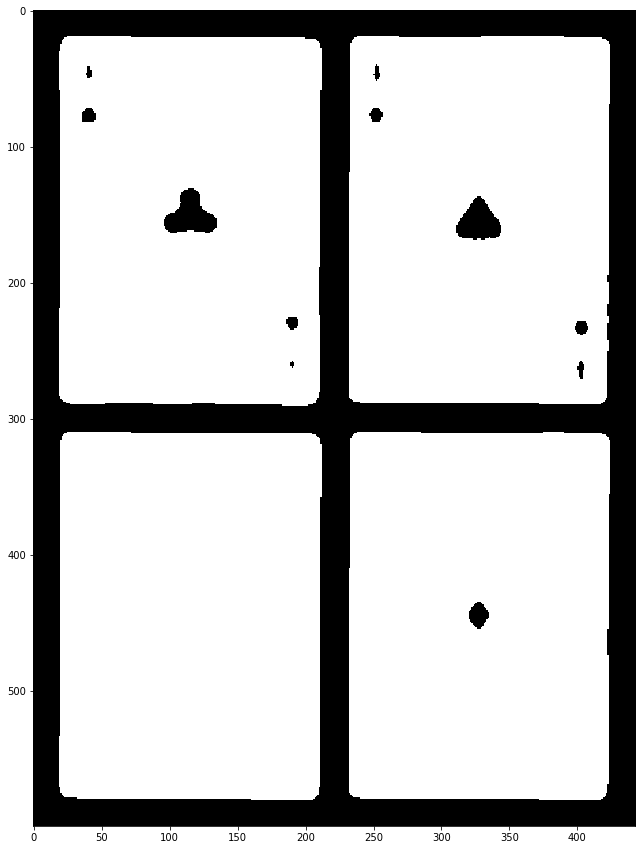

In [ ]:
thresh1 = cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 15))
plt.imshow(thresh1)
plt.show()

In [ ]:
contours = cv2.findContours(thresh, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
total = 0
# цикл по контурам
for c in contours[0]:
    # аппроксимируем (сглаживаем) контур
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)

    # если у контура 4 вершины, предполагаем, что это книга
    if len(approx) == 4:
        cv2.drawContours(image, [approx], -1, (0, 255, 0), 4)
        total += 1

Я нашёл 4 карт на этой картинке


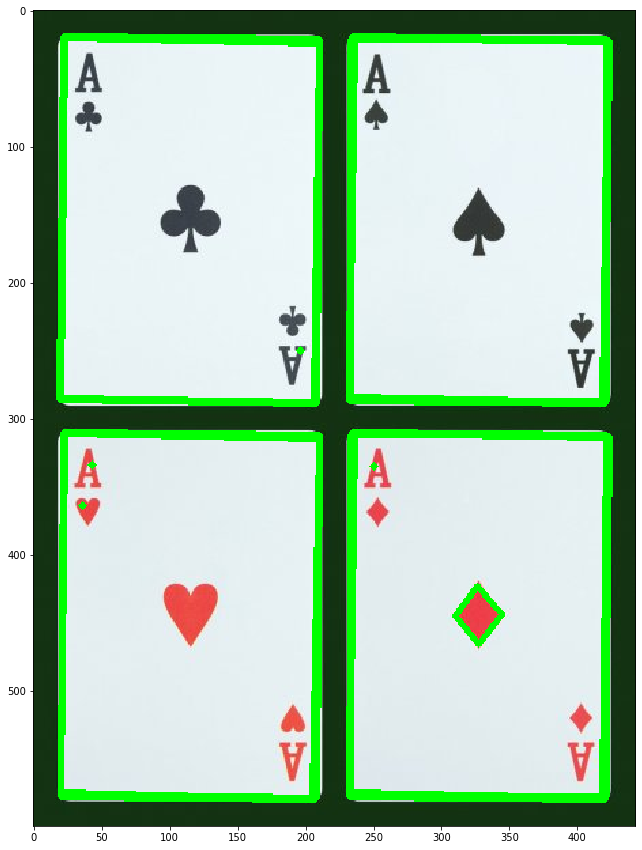

In [ ]:
# показываем результирующее изображение
print("Я нашёл {0} карт на этой картинке".format(total))
cv2.imwrite("output.jpg", image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 15))
plt.imshow(image)
plt.show()

# [Задание]

Определите более полный алгоритм реализации какой-либо игры и напишите его)

Например, можно использовать рандомное выпадение карт из колоды и тп. Илииии заменить карты на игральные кубики, или домино, или крестики-нолики,  или ....